In [1]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from imblearn.keras import BalancedBatchGenerator

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 42

/home/abhinandan/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/abhinandan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.shape

(54808, 14)

In [6]:
test.shape

(23490, 13)

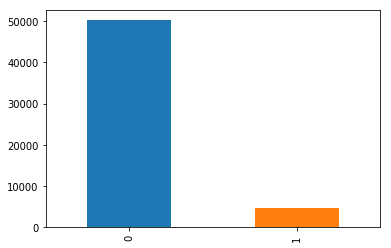

In [24]:
train['is_promoted'].value_counts().plot.bar()

In [7]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
train.isnull().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [10]:
test.isnull().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.044019
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.077139
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [11]:
train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [12]:
test['education'].unique()

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

In [13]:
train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [14]:
test['previous_year_rating'].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [17]:
for k,df in train.groupby(['is_promoted']):
    print("is_promoted: ",k)
    print(df.groupby(['education'])['education'].count().sort_values(ascending=False))

is_promoted:  0
education
Bachelor's          33661
Master's & above    13454
Below Secondary       738
Name: education, dtype: int64
is_promoted:  1
education
Bachelor's          3008
Master's & above    1471
Below Secondary       67
Name: education, dtype: int64


In [18]:
for k,df in train.groupby(['is_promoted']):
    print("is_promoted: ",k)
    print(df.groupby(['previous_year_rating'])['previous_year_rating'].count().sort_values(ascending=False))

is_promoted:  0
previous_year_rating
3.0    17263
5.0     9820
4.0     9093
1.0     6135
2.0     4044
Name: previous_year_rating, dtype: int64
is_promoted:  1
previous_year_rating
5.0    1921
3.0    1355
4.0     784
2.0     181
1.0      88
Name: previous_year_rating, dtype: int64


In [39]:
train[train['is_promoted'] == 1 & train['previous_year_rating'].isna()].shape[0]/train[train['previous_year_rating'].isna()].shape[0]

11.322502424830262

In [40]:
train[train['is_promoted'] == 1 & train['education'].isna()].shape[0]/train[train['education'].isna()].shape[0]

19.914902449149025

In [45]:
train[train['is_promoted'] == 1].groupby(['previous_year_rating'])['education'].value_counts()

previous_year_rating  education       
1.0                   Bachelor's            64
                      Master's & above      22
2.0                   Bachelor's           116
                      Master's & above      61
                      Below Secondary        2
3.0                   Bachelor's           830
                      Master's & above     480
                      Below Secondary       15
4.0                   Bachelor's           529
                      Master's & above     233
                      Below Secondary        5
5.0                   Bachelor's          1194
                      Master's & above     667
                      Below Secondary       14
Name: education, dtype: int64

In [42]:
train[train['is_promoted'] == 0].groupby(['previous_year_rating'])['education'].value_counts()

previous_year_rating  education       
1.0                   Bachelor's           4116
                      Master's & above     1652
                      Below Secondary        33
2.0                   Bachelor's           2716
                      Master's & above     1124
                      Below Secondary        16
3.0                   Bachelor's          11278
                      Master's & above     5077
                      Below Secondary       187
4.0                   Bachelor's           6014
                      Master's & above     2633
                      Below Secondary        95
5.0                   Bachelor's           6547
                      Master's & above     2849
                      Below Secondary        91
Name: education, dtype: int64

In [31]:
missing_df = train[train['previous_year_rating'].isna() & train['education'].isna()]
missing_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
90,62658,Sales & Marketing,region_2,NaN,f,sourcing,1,20,NaN,1,0,0,55,0
245,24414,R&D,region_2,NaN,m,other,1,25,NaN,1,1,0,76,0
475,36691,Sales & Marketing,region_14,NaN,m,other,1,24,NaN,1,1,0,55,0
508,6788,Sales & Marketing,region_2,NaN,f,other,2,40,NaN,1,1,0,51,0


In [32]:
missing_df['department'].value_counts()

Sales & Marketing    285
Analytics             61
Operations            13
R&D                    9
Technology             9
Procurement            4
Finance                2
HR                     2
Name: department, dtype: int64

In [33]:
missing_df['region'].value_counts()

region_2     122
region_22     71
region_7      31
region_16     20
region_26     19
region_32     17
region_31     14
region_15     13
region_27     12
region_29     10
region_13      9
region_9       8
region_28      8
region_14      8
region_6       4
region_25      3
region_5       2
region_8       2
region_11      2
region_1       2
region_23      2
region_20      1
region_21      1
region_17      1
region_30      1
region_24      1
region_3       1
Name: region, dtype: int64

In [34]:
missing_df['gender'].value_counts()

m    340
f     45
Name: gender, dtype: int64

In [35]:
missing_df['recruitment_channel'].value_counts()

other       217
sourcing    167
referred      1
Name: recruitment_channel, dtype: int64

In [36]:
missing_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,385.000000,385.000000,385.00000,0.0,385.0,385.000000,385.000000,385.000000,385.000000
mean,39135.270130,1.301299,25.14026,NaN,1.0,0.238961,0.020779,57.716883,0.064935
std,22742.741992,0.671304,2.79342,NaN,0.0,0.427004,0.142830,14.385697,0.246732
min,287.000000,1.000000,20.00000,NaN,1.0,0.000000,0.000000,40.000000,0.000000
25%,17686.000000,1.000000,23.00000,NaN,1.0,0.000000,0.000000,49.000000,0.000000
50%,38567.000000,1.000000,25.00000,NaN,1.0,0.000000,0.000000,51.000000,0.000000
75%,57818.000000,1.000000,27.00000,NaN,1.0,0.000000,0.000000,61.000000,0.000000
max,77943.000000,6.000000,41.00000,NaN,1.0,1.000000,1.000000,94.000000,1.000000


In [58]:
mode = {}
for k,v in train.groupby(['is_promoted']):
    mode[k] = v.groupby(['education'])['education'].count().sort_values(ascending=False).index[0]

In [110]:
train_c.loc[((train_c['is_promoted'] == train_c['is_promoted'].unique()[0]) & train_c['education'].isna()),'education'] = mode[train_c['is_promoted'].unique()[0]]
train_c.loc[((train_c['is_promoted'] == train_c['is_promoted'].unique()[1]) & train_c['education'].isna()),'education'] = mode[train_c['is_promoted'].unique()[1]]

In [112]:
def impute_na(df_train, df_test, variable, target):
    mode = {}
    for k,v in df_train.groupby([target]):
        mode[k] = v.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df_train.loc[((df_train[target] == df_train[target].unique()[0]) & df_train[variable].isna()),variable] = mode[df_train[target].unique()[0]]
    df_train.loc[((df_train[target] == df_train[target].unique()[1]) & df_train[variable].isna()),variable] = mode[df_train[target].unique()[1]]
    df_test.loc[((df_test[target] == df_test[target].unique()[1]) & df_test[variable].isna()),variable] = mode[df_test[target].unique()[1]]

In [113]:
impute_na(train, test, 'education', 'is_promoted')

KeyError: 'is_promoted'

In [ ]:
impute_na(train, test, 'previous_year_rating', 'is_promoted')

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
for col in train.columns:
    print("Unique values in ",col," : ",train[col].nunique()) 

In [ ]:
for col in test.columns:
    print("Unique values in ",col," : ",test[col].nunique())

In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
train_df = train.drop(['employee_id'], axis=1)

In [ ]:
test_df = test.drop(['employee_id'], axis=1)

In [ ]:
num_vars = ['age','length_of_service','avg_training_score']

In [ ]:
cat_vars = [col for col in test_df.columns if col not in num_vars]

In [ ]:
def cat_enc(df_train,df_test,variable,target):
    
    prob_df = df_train.groupby([variable])[target].mean()
    prob_df = pd.DataFrame(prob_df)
    prob_df['Not_' + target] = 1-prob_df[target]
    
    prob_df.loc[prob_df[target] == 0, target] = 0.00001
    prob_df.loc[prob_df['Not_' + target] == 0, 'Not_' + target] = 0.00001
    
    prob_df['WoE'] = np.log(prob_df[target]/prob_df['Not_' + target])
    
    woe_labels = prob_df['WoE'].to_dict()
    
    df_train[variable] = df_train[variable].map(woe_labels)
    df_test[variable] = df_test[variable].map(woe_labels)

In [ ]:
for col in cat_vars:
    cat_enc(train_df,test_df,col,'is_promoted')

In [ ]:
train_df.head()

In [ ]:
X = train_df.drop(['is_promoted'], axis=1).values
y = train_df['is_promoted'].values

In [ ]:
sm = SMOTE(random_state=101)
X_res, y_res = sm.fit_sample(X, y.ravel())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.utils import plot_model
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.layers.merge import concatenate
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [ ]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
input_shape = X_train.shape[1]

In [ ]:
input_layer = Input(shape=(input_shape,))

hidden1 = Dense(units = X_train.shape[1],kernel_initializer = 'uniform',
                activation = 'relu')(input_layer)
hidden2 = Dense(units = 6,kernel_initializer = 'uniform',
                activation = 'relu')(hidden1)
dropout = Dropout(rate=0.2)(hidden2)
output_layer = Dense(units = 1,kernel_initializer = 'uniform',
                activation = 'sigmoid')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)

# Compiling the ANN
model.compile(optimizer = 'adamax', 
              loss = 'binary_crossentropy', 
              metrics = [auroc])

# summarize layers
print(model.summary())

In [ ]:
# checkpoint
filepath="Best_Model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auroc', verbose=1, 
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X_train, 
          y_train,
          batch_size = 32,
          epochs = 20,
          validation_data=(X_test, y_test),
          callbacks=callbacks_list, 
          verbose=2)

In [ ]:
input_layer = Input(shape=(input_shape,))

hidden1 = Dense(units = X_train.shape[1],kernel_initializer = 'uniform',
                activation = 'relu')(input_layer)
hidden2 = Dense(units = 6,kernel_initializer = 'uniform',
                activation = 'relu')(hidden1)
dropout = Dropout(rate=0.2)(hidden2)
output_layer = Dense(units = 1,kernel_initializer = 'uniform',
                activation = 'sigmoid')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.load_weights('Best_Model.h5')

In [ ]:
test_df.head()

In [ ]:
y_preds = np.where(model.predict(test_df.values)<0.5,0,1)

In [ ]:
submission_df = pd.concat([test['employee_id'], 
                           pd.DataFrame(y_preds, columns=['is_promoted'])],
                          axis=1)

In [ ]:
submission_df.to_csv(r'submission.csv', index=False)